In [1]:
import os
import math
import glob
import pathlib
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def get_clusters_type(filename):
    types_dict = {
        'noise': 0,
        'mua': 1,
        'good': 2,
        'unsorted': 3
    }
    clusters_df = pd.read_csv(filename, sep='\t', header=0)
    clusters_df['type'] = clusters_df['KSLabel'].apply(lambda x: types_dict[x])
    clusters_df['type'] = clusters_df.apply(lambda x: types_dict[x['group']] if not pd.isna(x['group']) else x['type'], axis=1)
    return clusters_df

In [3]:
trial_type = 'sequence'
unit_type = '2'
standardize = True

In [4]:
idx = pd.IndexSlice
pre = 3
post = 6

In [5]:
#working_directory = r'C:\Users\shira\OneDrive\מסמכים\research\electrophysiology\analyze_electrophysiology_data\psth'
#working_directory = r'C:\Users\shira\OneDrive\מסמכים\research\electrophysiology\analyze_electrophysiology_data\psth'
working_directory = r'C:\Users\shirahad\Documents\research\electrophysiology\analyze_electrophysiology_data\psth'
directory = r'{}\files\{}'.format(working_directory, trial_type.lower()).replace('psth', 'pl2kilosort')

In [6]:
clusters_df = get_clusters_type(os.path.join(directory, 'cluster_info.tsv'))
clusters_df = clusters_df.set_index('id') if 'id' in clusters_df.columns else clusters_df.set_index('cluster_id')

In [7]:
clusters_df

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,type
id,,,,,,,,,,,
0,1279.0,100.0,mua,68.191452,24,0.0,6.782587,NaN,19644,0,1
1,1865.8,100.0,mua,72.620399,8,50.0,0.044886,NaN,130,0,1
3,1386.8,100.0,mua,79.897652,9,300.0,6.494628,NaN,18810,0,1
4,966.3,100.0,mua,55.939289,9,300.0,3.911969,NaN,11330,0,1
5,1484.7,100.0,mua,84.335373,13,350.0,4.018659,NaN,11639,0,1
...,...,...,...,...,...,...,...,...,...,...,...
78,1570.4,100.0,mua,89.746063,24,0.0,0.709886,noise,2056,0,0
79,1538.0,100.0,mua,72.785362,26,100.0,2.611317,NaN,7563,0,1
80,1538.0,100.0,mua,72.785362,26,100.0,0.430213,NaN,1246,0,1


In [8]:
pl_data = pd.read_csv(os.path.join(directory, 'files_extracted_data.csv'), header=0, index_col=0)

In [9]:
pl_data = pl_data.sort_values(by=['matlab_time']).reset_index(drop=True)

In [10]:
pl_data

,matlab_filename,ND,matlab_time,plexon_filename,plexon_time,intensity,plexon_samples_num,ad_frequency
0,C:\Users\shirahad\Documents\research\electroph...,10,2022-02-09 19:55:10,C:\Users\shirahad\Documents\research\electroph...,19:55:10,9.354108,16538418.0,40000.0
1,C:\Users\shirahad\Documents\research\electroph...,8,2022-02-09 20:02:28,C:\Users\shirahad\Documents\research\electroph...,20:02:28,11.354108,16548298.0,40000.0
2,C:\Users\shirahad\Documents\research\electroph...,6,2022-02-09 20:09:45,C:\Users\shirahad\Documents\research\electroph...,20:09:45,12.854108,16547657.0,40000.0
3,C:\Users\shirahad\Documents\research\electroph...,4,2022-02-09 20:17:10,C:\Users\shirahad\Documents\research\electroph...,20:17:10,13.854108,16547177.0,40000.0
4,C:\Users\shirahad\Documents\research\electroph...,3,2022-02-09 20:24:17,C:\Users\shirahad\Documents\research\electroph...,20:24:17,14.354108,16550178.0,40000.0
5,C:\Users\shirahad\Documents\research\electroph...,2,2022-02-09 20:31:24,C:\Users\shirahad\Documents\research\electroph...,20:31:24,14.854108,16547777.0,40000.0
6,C:\Users\shirahad\Documents\research\electroph...,1,2022-02-09 20:38:32,C:\Users\shirahad\Documents\research\electroph...,20:38:32,15.354108,16549297.0,40000.0


In [11]:
def reforamt_nds(df):
    df['ND'] = ['{}_{}'.format(element, i) for i, element in enumerate(df['ND'])]
    return df

In [12]:
for nd in pl_data['ND'].unique():
    pl_data.loc[pl_data['ND'] == nd] = reforamt_nds(pl_data.loc[pl_data['ND'] == nd])

<ipython-input-11-ab90c9152b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ND'] = ['{}_{}'.format(element, i) for i, element in enumerate(df['ND'])]
<ipython-input-11-ab90c9152b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ND'] = ['{}_{}'.format(element, i) for i, element in enumerate(df['ND'])]


In [13]:
pl_data

,matlab_filename,ND,matlab_time,plexon_filename,plexon_time,intensity,plexon_samples_num,ad_frequency
0,C:\Users\shirahad\Documents\research\electroph...,10_0,2022-02-09 19:55:10,C:\Users\shirahad\Documents\research\electroph...,19:55:10,9.354108,16538418.0,40000.0
1,C:\Users\shirahad\Documents\research\electroph...,8_0,2022-02-09 20:02:28,C:\Users\shirahad\Documents\research\electroph...,20:02:28,11.354108,16548298.0,40000.0
2,C:\Users\shirahad\Documents\research\electroph...,6_0,2022-02-09 20:09:45,C:\Users\shirahad\Documents\research\electroph...,20:09:45,12.854108,16547657.0,40000.0
3,C:\Users\shirahad\Documents\research\electroph...,4_0,2022-02-09 20:17:10,C:\Users\shirahad\Documents\research\electroph...,20:17:10,13.854108,16547177.0,40000.0
4,C:\Users\shirahad\Documents\research\electroph...,3_0,2022-02-09 20:24:17,C:\Users\shirahad\Documents\research\electroph...,20:24:17,14.354108,16550178.0,40000.0
5,C:\Users\shirahad\Documents\research\electroph...,2_0,2022-02-09 20:31:24,C:\Users\shirahad\Documents\research\electroph...,20:31:24,14.854108,16547777.0,40000.0
6,C:\Users\shirahad\Documents\research\electroph...,1_0,2022-02-09 20:38:32,C:\Users\shirahad\Documents\research\electroph...,20:38:32,15.354108,16549297.0,40000.0


In [14]:
spikes_times = np.load(os.path.join(directory, 'spike_times.npy'))
spike_clusters = np.load(os.path.join(directory, 'spike_clusters.npy'))

In [15]:
spikes_times

array([[      130],
       [      212],
       [      260],
       ...,
       [115828747],
       [115828755],
       [115828774]], dtype=uint64)

# Extract spike times for relevant clusters

In [16]:
relevant_clusters = clusters_df.index[clusters_df['type'] == int(unit_type)]

In [17]:
relevant_clusters

Int64Index([57, 69, 73, 81], dtype='int64', name='id')

In [18]:
def get_relevant_clusters_spikes_data(relevant_clusters, spike_clusters, spikes_times):
    cluster_indexes = relevant_clusters.map(lambda x: np.where(np.in1d(spike_clusters, x))[0])
    spikes_times = cluster_indexes.map(lambda x: spikes_times[x].flatten())
    spikes_data_index = [['cluster_indexes', 'spikes_times'], relevant_clusters]
    spikes_data_df = pd.DataFrame(cluster_indexes.append(spikes_times).to_list())
    spikes_data_df.set_index(pd.MultiIndex.from_product(spikes_data_index), inplace=True)
    spikes_data_df = spikes_data_df.transpose()
    empty_clusters = spikes_data_df.columns[spikes_data_df.isna().all()].get_level_values(1).unique()
    spikes_data_df = spikes_data_df.dropna(axis=1, how='all')
    relevant_clusters = relevant_clusters.drop(empty_clusters)
    return relevant_clusters, spikes_data_df

In [19]:
relevant_clusters, spikes_data_df = get_relevant_clusters_spikes_data(relevant_clusters, spike_clusters, spikes_times)
spikes_data_df.head(2)

cluster_indexes                          spikes_times                    \
id              57      69      73       81           57       69       73   
0             68.0  1044.0   287.0  18174.0       3450.0  81255.0  23913.0   
1           3276.0  1361.0  1040.0  18535.0     159673.0  94041.0  81124.0   

              
id        81  
0   932914.0  
1   946469.0

In [20]:
pl_data['cumulative_plexon_samples_num'] = np.cumsum(pl_data['plexon_samples_num'])
pl_data

,matlab_filename,ND,matlab_time,plexon_filename,plexon_time,intensity,plexon_samples_num,ad_frequency,cumulative_plexon_samples_num
0,C:\Users\shirahad\Documents\research\electroph...,10_0,2022-02-09 19:55:10,C:\Users\shirahad\Documents\research\electroph...,19:55:10,9.354108,16538418.0,40000.0,16538418.0
1,C:\Users\shirahad\Documents\research\electroph...,8_0,2022-02-09 20:02:28,C:\Users\shirahad\Documents\research\electroph...,20:02:28,11.354108,16548298.0,40000.0,33086716.0
2,C:\Users\shirahad\Documents\research\electroph...,6_0,2022-02-09 20:09:45,C:\Users\shirahad\Documents\research\electroph...,20:09:45,12.854108,16547657.0,40000.0,49634373.0
3,C:\Users\shirahad\Documents\research\electroph...,4_0,2022-02-09 20:17:10,C:\Users\shirahad\Documents\research\electroph...,20:17:10,13.854108,16547177.0,40000.0,66181550.0
4,C:\Users\shirahad\Documents\research\electroph...,3_0,2022-02-09 20:24:17,C:\Users\shirahad\Documents\research\electroph...,20:24:17,14.354108,16550178.0,40000.0,82731728.0
5,C:\Users\shirahad\Documents\research\electroph...,2_0,2022-02-09 20:31:24,C:\Users\shirahad\Documents\research\electroph...,20:31:24,14.854108,16547777.0,40000.0,99279505.0
6,C:\Users\shirahad\Documents\research\electroph...,1_0,2022-02-09 20:38:32,C:\Users\shirahad\Documents\research\electroph...,20:38:32,15.354108,16549297.0,40000.0,115828802.0


In [21]:
def get_spike_times_by_nd(spikes_df, pl_data, result_df, Hz): # TODO:: improve function, now runs 16.5 sec
    idx = pd.IndexSlice
    left = 0
    for nd in pl_data['ND']:   
        right = pl_data.loc[pl_data['ND'] == nd, 'cumulative_plexon_samples_num'].item()
        result_df.loc[:, idx[:, nd]] = result_df.apply( 
            lambda x: spikes_df[spikes_df[x.name[0]].between(left, right)][x.name[0]].reset_index(drop=True) / Hz)
        left = right
    return result_df[: result_df.last_valid_index()]

In [22]:
def align_df_times(df, pl_data, Hz, index): #TODO:: rename index variable
    idx = pd.IndexSlice
    nds_to_align = pl_data['ND'][1:]
    for nd in nds_to_align:
        df.loc[:, idx[:, nd]] = df.loc[:, idx[:, nd]].apply(lambda x: x - pl_data.loc[pl_data.loc[pl_data['ND'] == nd].index - index, 'cumulative_plexon_samples_num'].item() / Hz)
    return df

In [23]:
def get_spikes_times_in_seconds(relevant_clusters, pl_data, spikes_df, Hz):
    cluster_nd_index = pd.MultiIndex.from_product([relevant_clusters, pl_data['ND']], names=['id', 'nd'])
    spikes_times_df = pd.DataFrame(np.nan, index=np.arange(0, len(spikes_df)), columns=cluster_nd_index)
    spikes_times_df = get_spike_times_by_nd(spikes_df, pl_data, spikes_times_df, Hz)
    spikes_times_df = align_df_times(spikes_times_df, pl_data, Hz, 1)
    return spikes_times_df

In [24]:
aligned_spikes_times_df = get_spikes_times_in_seconds(relevant_clusters, pl_data, spikes_data_df['spikes_times'], pl_data['ad_frequency'][0])
aligned_spikes_times_df.head(2)

id        57                                                             \
nd      10_0       8_0       6_0       4_0      3_0       2_0       1_0   
0   0.086250  0.960225  0.900100  3.407925  2.28340  0.100025  1.820075   
1   3.991825  3.183400  1.789825  5.435250  2.30365  3.265825  1.877475   

id        69                    ...        73                             81  \
nd      10_0     8_0       6_0  ...       3_0       2_0       1_0       10_0   
0   2.031375  0.1762  1.310475  ...  1.668050  0.073625  0.325375  23.322850   
1   2.351025  1.5698  3.911325  ...  1.953275  0.945775  1.021200  23.661725   

id                                                              
nd       8_0       6_0       4_0       3_0       2_0       1_0  
0   1.603150  0.151950  1.077325  0.263675  0.075775  0.257475  
1   2.335275  0.202475  1.892025  1.607400  9.338900  0.615475  

[2 rows x 28 columns]

In [ ]:
temp = aligned_spikes_times_df.copy()

In [ ]:
temp = temp[9].fillna(0)

In [ ]:
(temp.astype(bool).sum(axis=0) == 0).value_count

In [ ]:
temp.dropna(axis=1, how='all')

In [25]:
events_ts_df = pd.read_csv(os.path.join(directory, 'events_ts.csv'), header=0, index_col=0)
events_ts_df.head(2)

,10_0_on,8_0_on,6_0_on,4_0_on,3_0_on,2_0_on,1_0_on,10_0_off,8_0_off,6_0_off,4_0_off,3_0_off,2_0_off,1_0_off
0,14.64865,14.910875,14.875425,14.863725,14.932000,14.89775,14.934725,24.614925,24.877325,24.845025,24.829225,24.900425,24.865300,24.90440
1,34.58350,34.844300,34.813250,34.800450,34.868425,34.83490,34.868725,44.554200,44.812375,44.783000,44.770300,44.834350,44.799825,44.83285


In [26]:
events_ts_df

,10_0_on,8_0_on,6_0_on,4_0_on,3_0_on,2_0_on,1_0_on,10_0_off,8_0_off,6_0_off,4_0_off,3_0_off,2_0_off,1_0_off
0,14.648650,14.910875,14.875425,14.863725,14.932000,14.897750,14.934725,24.614925,24.877325,24.845025,24.829225,24.900425,24.865300,24.904400
1,34.583500,34.844300,34.813250,34.800450,34.868425,34.834900,34.868725,44.554200,44.812375,44.783000,44.770300,44.834350,44.799825,44.832850
2,54.525250,54.780650,54.749125,54.737225,54.801825,54.768675,54.800275,64.492450,64.747100,64.716375,64.702900,64.769375,64.732750,64.769350
3,74.459900,74.718700,74.685025,74.670625,74.741025,74.701025,74.737775,84.425100,84.691375,84.657225,84.643475,84.707325,84.669550,84.701625
4,94.399275,94.662525,94.624625,94.617300,94.673625,94.635450,94.670125,104.370025,104.627900,104.594225,104.586200,104.642800,104.604975,104.637050
5,114.334550,114.595725,114.561775,114.556175,114.609175,114.569300,114.604150,124.302525,124.564050,124.529500,124.523500,124.576325,124.535075,124.572725
6,134.271725,134.534275,134.498175,134.493900,134.545325,134.501725,134.541675,144.241175,144.501150,144.464275,144.459825,144.513550,144.467125,144.505425
7,154.207225,154.471675,154.433725,154.429225,154.481350,154.435100,154.476950,164.173700,164.441325,164.402150,164.397700,164.448850,164.400025,164.444400
8,174.143675,174.410525,174.372000,174.365100,174.414175,174.369750,174.407325,184.112525,184.377775,184.339275,184.332450,184.384000,184.337025,184.373200
9,194.083825,194.344125,194.307400,194.302400,194.355275,194.307125,194.338925,204.049175,204.313625,204.273200,204.270150,204.324800,204.272775,204.306650


In [27]:
def get_spikes_between_times(spikes_df, start, end):
    return spikes_df[(spikes_df >= start) & (spikes_df <= end)].reset_index(drop=True)

def get_aligned_reps_times(events_df, result_df, pre=0, post=0):
    result_df = result_df.apply(lambda x: get_spikes_between_times(x, 
                                                                   (events_df['{}_on'.format(x.name[1])][x.name[2]] - pre), 
                                                                   (events_df['{}_off'.format(x.name[1])][x.name[2]] + post)))
    result_df = result_df.apply(lambda x: x - (events_df['{}_on'.format(x.name[1])][x.name[2]] - pre))
    return result_df

In [28]:
idx = pd.IndexSlice
cluster_nd_rep_index = pd.MultiIndex.from_product([relevant_clusters, pl_data['ND'], np.arange(0, len(events_ts_df))], 
                                                     names=['id', 'nd', 'rep'])
spikes_reps_times_df = pd.DataFrame(np.nan, index=np.arange(0, len(aligned_spikes_times_df)), columns=cluster_nd_rep_index)
spikes_reps_times_df = spikes_reps_times_df.apply(lambda x: aligned_spikes_times_df.loc[:, idx[x.name[0], x.name[1]]].values)
spikes_reps_times_df = get_aligned_reps_times(events_ts_df, spikes_reps_times_df, pre + 1, post + 1)
spikes_reps_times_df.head(2)

id         57                                                                  \
nd       10_0                                                                   
rep        0       1        2        3        4         5         6        7    
0    1.032975  2.1662  0.06980  3.55815  5.47520  5.086250  1.909575  4.21610   
1    2.532625  9.1849  3.73385  5.22140  6.81925  5.132475  7.332650  4.61715   

id                     ...         81                                          \
nd                     ...        1_0                                           
rep        8       9   ...         10        11        12        13        14   
0    4.982150  0.9218  ...   0.453850  2.728350  0.203025  0.184525  1.252925   
1    6.132625  1.8029  ...  15.002075  4.435525  0.336725  0.342150  2.342525   

id                                                     
nd                                                     
rep        15        16        17        18        19  
0    2.488325  1.986000  1.146675  0.023300  1.804225  
1    7.749275  2.073375  2.155750  0.050125  1.871700  

[2 rows x 560 columns]

In [29]:
spikes_reps_times_df

id          57                                                                 \
nd        10_0                                                                  
rep         0         1          2         3          4          5         6    
0     1.032975  2.166200   0.069800  3.558150   5.475200   5.086250  1.909575   
1     2.532625  9.184900   3.733850  5.221400   6.819250   5.132475  7.332650   
2     8.097850  9.310175   5.927750  5.267675   9.155275   5.990325  7.405150   
3    16.110200  9.492600   9.258525  5.303900   9.674575   6.546550  7.543575   
4    16.231900  9.508650  13.562175  5.866525  12.818250  17.436000  7.647950   
..         ...       ...        ...       ...        ...        ...       ...   
145        NaN       NaN        NaN       NaN        NaN        NaN       NaN   
146        NaN       NaN        NaN       NaN        NaN        NaN       NaN   
147        NaN       NaN        NaN       NaN        NaN        NaN       NaN   
148        NaN       NaN        NaN       NaN        NaN        NaN       NaN   
149        NaN       NaN        NaN       NaN        NaN        NaN       NaN   

id                                 ...         81                      \
nd                                 ...        1_0                       
rep        7         8         9   ...         10        11        12   
0    4.216100  4.982150  0.921800  ...   0.453850  2.728350  0.203025   
1    4.617150  6.132625  1.802900  ...  15.002075  4.435525  0.336725   
2    4.956850  7.571375  4.252675  ...  15.577475  4.606675  0.682100   
3    5.242650  8.397000  8.869625  ...  15.611900  7.983325  0.717650   
4    9.368225  9.557075  8.906625  ...  18.577050  9.566625  0.833025   
..        ...       ...       ...  ...        ...       ...       ...   
145       NaN       NaN       NaN  ...        NaN       NaN       NaN   
146       NaN       NaN       NaN  ...        NaN       NaN       NaN   
147       NaN       NaN       NaN  ...        NaN       NaN       NaN   
148       NaN       NaN       NaN  ...        NaN       NaN       NaN   
149       NaN       NaN       NaN  ...        NaN       NaN       NaN   

id                                                                           
nd                                                                           
rep        13        14         15        16         17        18        19  
0    0.184525  1.252925   2.488325  1.986000   1.146675  0.023300  1.804225  
1    0.342150  2.342525   7.749275  2.073375   2.155750  0.050125  1.871700  
2    8.580675  2.524325  10.541025  4.080675   4.932900  0.214475  1.922875  
3    9.320400  2.603025  11.522300  4.124450   6.056500  0.262950  1.988175  
4    9.325600  2.658200  11.559725  4.485925  10.834875  0.578650  2.192050  
..        ...       ...        ...       ...        ...       ...       ...  
145       NaN       NaN        NaN       NaN        NaN       NaN       NaN  
146       NaN       NaN        NaN       NaN        NaN       NaN       NaN  
147       NaN       NaN        NaN       NaN        NaN       NaN       NaN  
148       NaN       NaN        NaN       NaN        NaN       NaN       NaN  
149       NaN       NaN        NaN       NaN        NaN       NaN       NaN  

[150 rows x 560 columns]

In [30]:
# aligned_spikes_times_df = Gst in matlab
# spikes_reps_times_df = seg in matlab
# interp_hist_df = qhistValueAll in matlab
# aligned_interp_hist_df = qhistValueAllnor, spikerate in matlab
# data_points = qx in matlab

In [31]:
# split events_ts_df and spikes_reps_times_df according to suffix

In [32]:
pl_data['original_nd'] = pl_data['ND'].apply(lambda x: x.rsplit('_', 1)[0])
pl_data['duplicate'] = pl_data[['original_nd']].duplicated()

In [33]:
pl_data

,matlab_filename,ND,matlab_time,plexon_filename,plexon_time,intensity,plexon_samples_num,ad_frequency,cumulative_plexon_samples_num,original_nd,duplicate
0,C:\Users\shirahad\Documents\research\electroph...,10_0,2022-02-09 19:55:10,C:\Users\shirahad\Documents\research\electroph...,19:55:10,9.354108,16538418.0,40000.0,16538418.0,10,False
1,C:\Users\shirahad\Documents\research\electroph...,8_0,2022-02-09 20:02:28,C:\Users\shirahad\Documents\research\electroph...,20:02:28,11.354108,16548298.0,40000.0,33086716.0,8,False
2,C:\Users\shirahad\Documents\research\electroph...,6_0,2022-02-09 20:09:45,C:\Users\shirahad\Documents\research\electroph...,20:09:45,12.854108,16547657.0,40000.0,49634373.0,6,False
3,C:\Users\shirahad\Documents\research\electroph...,4_0,2022-02-09 20:17:10,C:\Users\shirahad\Documents\research\electroph...,20:17:10,13.854108,16547177.0,40000.0,66181550.0,4,False
4,C:\Users\shirahad\Documents\research\electroph...,3_0,2022-02-09 20:24:17,C:\Users\shirahad\Documents\research\electroph...,20:24:17,14.354108,16550178.0,40000.0,82731728.0,3,False
5,C:\Users\shirahad\Documents\research\electroph...,2_0,2022-02-09 20:31:24,C:\Users\shirahad\Documents\research\electroph...,20:31:24,14.854108,16547777.0,40000.0,99279505.0,2,False
6,C:\Users\shirahad\Documents\research\electroph...,1_0,2022-02-09 20:38:32,C:\Users\shirahad\Documents\research\electroph...,20:38:32,15.354108,16549297.0,40000.0,115828802.0,1,False


In [34]:
def split_by_chunks(df_to_split, split_chunks):
    splitted_df_list = []
    for chunk in split_chunks.split(';'):
        indices = chunk.split(',')
        indices_array = np.array(indices, dtype=np.int64)
        splitted_df_list.append(df_to_split.loc[indices_array])
    return splitted_df_list

In [35]:
def split_df_by_splitted_data(splitted_data, df_to_split, level=0):
    splitted_df_list = []
    for df in splitted_data:
        relevant_columns = df_to_split.columns[df_to_split.columns.get_level_values(level).str.startswith(tuple(df['ND']))]
        splitted_df_list.append(df_to_split[relevant_columns].dropna(how='all', axis=0))
    return splitted_df_list

In [36]:
split_chunks = '0, 1, 2, 3, 4, 5, 6' #; 7; 8, 9, 10, 11, 12, 13, 14'

In [37]:
splitted_pl_data = split_by_chunks(pl_data.copy(), split_chunks)

In [38]:
splitted_events_ts = split_df_by_splitted_data(splitted_pl_data, events_ts_df)
splitted_spikes_reps_times = split_df_by_splitted_data(splitted_pl_data, spikes_reps_times_df, 1)

In [39]:
splitted_spikes_reps_times

[id          57                                                                 \
 nd        10_0                                                                  
 rep         0         1          2         3          4          5         6    
 0     1.032975  2.166200   0.069800  3.558150   5.475200   5.086250  1.909575   
 1     2.532625  9.184900   3.733850  5.221400   6.819250   5.132475  7.332650   
 2     8.097850  9.310175   5.927750  5.267675   9.155275   5.990325  7.405150   
 3    16.110200  9.492600   9.258525  5.303900   9.674575   6.546550  7.543575   
 4    16.231900  9.508650  13.562175  5.866525  12.818250  17.436000  7.647950   
 ..         ...       ...        ...       ...        ...        ...       ...   
 145        NaN       NaN        NaN       NaN        NaN        NaN       NaN   
 146        NaN       NaN        NaN       NaN        NaN        NaN       NaN   
 147        NaN       NaN        NaN       NaN        NaN        NaN       NaN   
 148        NaN 

# Histograms

In [40]:
def get_events_duration(events_ts_df, nds):
    for nd in nds:
        events_ts_df['{}_duration'.format(nd)] = events_ts_df['{}_off'.format(nd)] - events_ts_df['{}_on'.format(nd)]
    return events_ts_df

In [41]:
def get_mean_duration_per_nd(events_ts_df, nds):
    return {nd: events_ts_df['{}_duration'.format(nd)].mean() for nd in nds}

In [42]:
def get_histogram_parameters(histogram, histogram_df):
    histogram_df['values'] = histogram_df['values'].apply(lambda x: histogram.T[0][x.name[0]][x.name[1]][x.name[2]])
    histogram_df['edges'] = histogram_df['edges'].apply(lambda x: histogram.T[1][x.name[0]][x.name[1]][x.name[2]])
    histogram_df['histogram'] = histogram_df['histogram'].apply(lambda x: histogram.T[2][x.name[0]][x.name[1]][x.name[2]])
    histogram_df['values'] = histogram_df['values'].apply(lambda x: x.shift(1, fill_value=x[0])) # TODO:: why shift?
    histogram_df = histogram_df.dropna(how='all')
    return histogram_df

In [43]:
def interpolate_histogram_values(histogram_df, result_df, last_data_point, data_points_num):
    data_points = np.linspace(0, last_data_point, data_points_num)
    result_df = result_df.apply(lambda x: np.interp(data_points, 
                                                    histogram_df['edges'][x.name[0]][x.name[1]][x.name[2]], 
                                                    histogram_df['values'][x.name[0]][x.name[1]][x.name[2]]))
    # remove first and last second which doesn't interpolate well, now pre = 3 and post = 6
    relevant_indices = np.where((data_points > 1) & (data_points < last_data_point - 2))
    result_df = result_df.iloc[relevant_indices[0], :].reset_index(drop=True)
    data_points = data_points[relevant_indices]
    return result_df, data_points

In [44]:
def apply_func_on_sub_df(df, result_df, result_col_name, indices, func):
    idx = pd.IndexSlice
    result_df = result_df.loc[:, idx[:, :, result_col_name]].apply(
        lambda x: getattr(df[x.name[0]][x.name[1]].iloc[indices].mean(axis=0), func.__name__)())
    return result_df

In [45]:
def calculate_statistics(hist_df, result_df, indices, mean_col, std_col, sem_col): # TODO:: rename function
    idx = pd.IndexSlice
    result_df.loc[0, idx[:, :, mean_col]] = apply_func_on_sub_df(hist_df, result_df, mean_col, indices, pd.DataFrame.mean)
    result_df.loc[0, idx[:, :, std_col]] = apply_func_on_sub_df(hist_df, result_df, std_col, indices, pd.DataFrame.std)
    result_df.loc[0, idx[:, :, sem_col]] = apply_func_on_sub_df(hist_df, result_df, sem_col, indices, pd.DataFrame.sem)
    return result_df

In [46]:
def calculate_psth_statistics(statistics_df, hist_df):
    idx = pd.IndexSlice
    statistics_df.loc[:, idx[:, :, 'mean_psth']] = statistics_df.loc[:, idx[:, :, 'mean_psth']].apply(
        lambda x: hist_df[x.name[0]][x.name[1]].mean(axis=1))
    statistics_df.loc[:, idx[:, :, 'std_psth']] = statistics_df.loc[:, idx[:, :, 'std_psth']].apply(
        lambda x: hist_df[x.name[0]][x.name[1]].std(axis=1))
    statistics_df.loc[:, idx[:, :, 'sem_psth']] = statistics_df.loc[:, idx[:, :, 'sem_psth']].apply(
        lambda x: hist_df[x.name[0]][x.name[1]].sem(axis=1))
    return statistics_df

In [47]:
def get_clusters_groups_from_multiindex_df(multiindex_df, curr_pl_data):
    stacked_df = multiindex_df.stack(['id', 'nd']).reset_index()
    stacked_df['int_nd'] = stacked_df['nd'].apply(lambda x: pd.to_numeric(x[: x.find('_')]))
    stacked_df = stacked_df.sort_values(['id', 'int_nd']).reset_index(drop=True)
    stacked_df = stacked_df.merge(curr_pl_data[['ND', 'intensity']], left_on = 'nd', right_on = 'ND', how = 'left')
    cluster_groups = stacked_df.groupby(['id'])
    return cluster_groups

In [48]:
def get_clusters_to_remove_according_to_baseline(clusters_groups, base_column):
    clusters_to_remove = []
    for (index, group) in clusters_groups:
        if group[base_column].max() <= 0.5:
            clusters_to_remove.append(index)
    return clusters_to_remove

In [49]:
def get_early_response_and_steady_state_and_off_indices(length, pre, post, early_response = 1.5, steady_state = 3, off = 2):
    early_response_indices = np.arange(pre * 5, (pre + early_response) * 5 - 1)
    steady_state_indices = np.arange(length - (post + steady_state) * 5 + 1, length - post * 5 + 1)
    off_indices = np.arange(length - post * 5 + 1, length - post * 5 + off * 5 + 1) # verify
    return early_response_indices, steady_state_indices, off_indices

In [50]:
def temp_get_early_response_and_steady_state_and_off_indices(length, MS, bin_length, pre, post, early_response = 1.5, steady_state = 3, off = 2):
    early_response_indices = np.arange(pre * MS / bin_length, (pre + early_response) * MS / bin_length - 1)
    steady_state_indices = np.arange(length - (post + steady_state) * MS / bin_length + 1, length - post * MS / bin_length + 1)
    off_indices = np.arange(length - post * MS / bin_length + 1, length - post * MS / bin_length + off * MS / bin_length + 1) # verify
    return early_response_indices, steady_state_indices, off_indices

# Plotting

In [51]:
def plot_shaded_error_bar(ax, x, y, error):
    if len(y) < len(x):
        x = x[: len(y)]
    ax.plot(x, y, '-')
    ax.fill_between(x, y - error, y + error, alpha=0.35)
    return

In [52]:
def set_plot_format(ax, key, xlabel, ylabel, legend_labels=None):
    ax.set_title('cluster id: {}'.format(key), fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    if legend_labels is not None:
        ax.legend(legend_labels, fontsize='large', loc='upper left', framealpha=0.3)
    return

In [53]:
def plot_vertical_lines(ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.vlines(3, ylim[0], ylim[1], color='black', linestyles='dashed')
    ax.vlines(13, ylim[0], ylim[1], color='black', linestyles='dashed')
    return

In [54]:
def get_intensity(entity, field='intensity'):
    if isinstance(entity, pd.Series):
        return entity[field].unique()
    elif isinstance(entity, pd.DataFrame):
        return entity[field].unique()[0]
    else:
        return entity[field].T.drop_duplicates()

In [55]:
def plot_movement_data(ax, movement_df, pl_data):
    movement_groups = get_clusters_groups_from_multiindex_df(movement_df.loc[:, idx[:, :, ['mean_psth', 'sem_psth']]], pl_data)
    for name, group in movement_groups:
        nd_groups = group.groupby(['nd'], sort=False)
        nd_groups.apply(lambda x: plot_shaded_error_bar(ax, movement_df.index, (x['mean_psth'] + (x['int_nd'] - 1) * 2000), x['sem_psth']))
        intensities = nd_groups.apply(get_intensity)
        set_plot_format(ax, name, "", "")
        

In [56]:
def plot(data_points, cluster_groups, base_cluster_groups, early_state_cluster_groups, steady_state_cluster_groups, off_cluster_groups, plots_filename, cols_num=5, rows_num=12):
    keys = list(cluster_groups.groups.keys())
    
    divided_list = [keys[x : x + rows_num] for x in range(0, len(keys), rows_num)]

    with PdfPages(plots_filename) as pdf:
        for l in divided_list:
            fig, axes = plt.subplots(figsize=((rows_num + 1) * 2, cols_num * 18), nrows=rows_num, ncols=cols_num, gridspec_kw=dict(hspace=0.4, wspace=0.3))
            for key, ax in zip(l, axes):
                group = cluster_groups.get_group(key)
                base_group = base_cluster_groups.get_group(key)
                early_state_group = early_state_cluster_groups.get_group(key)
                steady_state_group = steady_state_cluster_groups.get_group(key)
                off_group = off_cluster_groups.get_group(key)
                nd_groups = group.groupby(['nd'], sort=False)
                nd_groups.apply(lambda x: plot_shaded_error_bar(ax[0], data_points, x['mean_psth'], x['sem_psth']))
                intensities = nd_groups.apply(get_intensity)
                plot_vertical_lines(ax[0])
                set_plot_format(ax[0], key, 'Time(sec)', '$Firing\ rate(spikes\ sec^{-1})$', np.round(intensities, 1))
                ax[1].errorbar(intensities, early_state_group['mean'], early_state_group['sem'])
                set_plot_format(ax[1], key, 'Light intensity\n($log\ photons\ cm^{-2}\ s^{-1}$)', '$Light\ evoked\ early\ firing\ rate(spikes\ sec^{-1})$')
                ax[2].errorbar(intensities, steady_state_group['mean'], steady_state_group['sem'])
                set_plot_format(ax[2], key, 'Light intensity\n($log\ photons\ cm^{-2}\ s^{-1}$)', 'Light evoked steadystate \n$firing\ rate(spikes\ sec^{-1})$')
                ax[3].errorbar(intensities, off_group['mean'], off_group['sem'])
                set_plot_format(ax[3], key, 'Light intensity\n($log\ photons\ cm^{-2}\ s^{-1}$)', '$Light\ evoked\ off\ firing\ rate(spikes\ sec^{-1})$')
                ax[4].errorbar(intensities, base_group['mean_base'], base_group['sem_base'])
                set_plot_format(ax[4], key, 'Light intensity\n($log\ photons\ cm^{-2}\ s^{-1}$)', '$Baseline\ firing\ rate(spikes\ sec^{-1})$')
            pdf.savefig(fig, bbox_inches='tight')
    return

In [ ]:
plot(bins_vector / MS, cluster_groups, base_cluster_groups, early_state_cluster_groups, steady_state_cluster_groups, off_cluster_groups, movement_statistics_df, movement_pl_data, plots_filename)

In [ ]:
# create the plot matrix
rows_num = len(relevant_clusters)
cols_num = 5
fig, axes = plt.subplots(figsize=((rows_num + 1) * 2, cols_num * 18), nrows=rows_num, ncols=cols_num, gridspec_kw=dict(hspace=0.4, wspace=0.3))
# fix the data structure in order to plot it
cluster_groups = get_clusters_groups_from_multiindex_df(statistics_df.loc[:, idx[:, :, ['mean_psth', 'sem_psth']]], pl_data)
early_state_cluster_groups = get_clusters_groups_from_multiindex_df(early_state_df.loc[:, idx[:, :, ['mean', 'sem']]], pl_data)
steady_state_cluster_groups = get_clusters_groups_from_multiindex_df(steady_state_df.loc[:, idx[:, :, ['mean', 'sem']]], pl_data)
off_cluster_groups = get_clusters_groups_from_multiindex_df(off_df.loc[:, idx[:, :, ['mean', 'sem']]], pl_data)
# plot base, psth, early state and steady state
plot(axes, data_points, cluster_groups, base_cluster_groups, early_state_cluster_groups, steady_state_cluster_groups, off_cluster_groups)
plots_filename = r'{}\files\plots.pdf'.format(working_directory)
plt.savefig(plots_filename, bbox_inches='tight') # save plots
os.startfile(plots_filename)

In [ ]:
clusters_df = pd.DataFrame(0, index=relevant_clusters, columns=['cluster_response_type'])
clusters_df

In [ ]:
response_types = ['Transient ON', 'Transient ON and transient OFF', 'Sustained ON', 
                  'Delayed ON', 'Sustained OFF', 'Transient ON not intensity encoding']
response_type_df = pd.DataFrame(response_types, columns=['response_type'])
response_type_df.index = response_type_df.index + 1
response_type_df

In [ ]:
# Write each dataframe to a different worksheet.
xlsx_filename = '{}\files\clusters_summary.xlsx'.format(working_directory)
with pd.ExcelWriter(xlsx_filename) as writer:  
    response_type_df.to_excel(writer, sheet_name='response_types')
    clusters_df.to_excel(writer, sheet_name='clusters_response_type')
    statistics_df.loc[:, idx[:, :, ['mean_psth']]].to_excel(writer, sheet_name='mean_psth')
    early_state_df.loc[:, idx[:, :, ['mean']]].to_excel(writer, sheet_name='early_state_mean')
    steady_state_df.loc[:, idx[:, :, ['mean']]].to_excel(writer, sheet_name='steady_state_mean')
    off_df.loc[:, idx[:, :, ['mean']]].to_excel(writer, sheet_name='off_mean')
    writer.save()

In [ ]:
print('''Please classify the clusters in the {} file, it is located in the current working directory: 
{}'''.format(filename, pathlib.Path().absolute()))

In [57]:
length_of_trial = 20000

In [58]:
bin_length = 100

In [59]:
MS = 1000

In [60]:
remove_low_baseline_clusters = False #True

In [75]:
i = 0
curr_events_ts_df = splitted_events_ts[i]
curr_spikes_reps_times_df = splitted_spikes_reps_times[i]
curr_pl_data = splitted_pl_data[i]

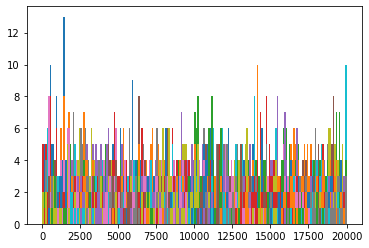

In [78]:
curr_events_ts_df = get_events_duration(curr_events_ts_df, curr_pl_data['ND'])
nd_mean_duration = get_mean_duration_per_nd(curr_events_ts_df, curr_pl_data['ND'])
general_mean_duration = np.array(list(nd_mean_duration.values())).mean()

# create histogram for all repetitions 
bins_vector = np.arange(0, length_of_trial + bin_length, step=bin_length)

curr_spikes_reps_ms_df = (curr_spikes_reps_times_df * MS).fillna(-1)

histogram = curr_spikes_reps_ms_df.apply(plt.hist, bins=bins_vector, histtype='stepfilled') # create histograms
# save histograms parameters
hist_index = pd.MultiIndex.from_product([['values', 'edges', 'histogram'], relevant_clusters, curr_pl_data['ND'], 
                                         np.arange(0, len(curr_events_ts_df))], names=['hist', 'id', 'nd', 'rep'])
histogram_df = pd.DataFrame(np.nan, index=np.arange(0, len(curr_spikes_reps_times_df + 1)), columns=hist_index)
histogram_df = get_histogram_parameters(histogram, histogram_df)
bins_per_sec = MS / bin_length
histogram_values_df = histogram_df['values'] * bins_per_sec

three_sec = int((pre * MS) / bin_length)

# if all nds are equal use the original data (without normalization)
if len(pd.unique(curr_pl_data['original_nd'])) == 1:
    standardize = False

# standardize the data
if standardize: 
    aligned_hist_df = histogram_values_df - histogram_values_df[0 : three_sec].mean(axis=0) 
else:
    aligned_hist_df = histogram_values_df

In [79]:
histogram_values_df

id       57                                                 ...   81        \
nd     10_0                                                 ...  1_0         
rep      0    1     2     3    4    5    6    7    8    9   ...   10    11   
0.0     0.0  0.0  10.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
1.0     0.0  0.0  10.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
2.0     0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
3.0     0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
4.0     0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
...     ...  ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
196.0   0.0  0.0   0.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
197.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
198.0  10.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   
199.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  10.0   
200.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   0.0   

id                                                   
nd                                                   
rep      12    13   14    15   16    17    18    19  
0.0     0.0   0.0  0.0   0.0  0.0   0.0  20.0   0.0  
1.0     0.0   0.0  0.0   0.0  0.0   0.0  20.0   0.0  
2.0     0.0  10.0  0.0   0.0  0.0   0.0   0.0   0.0  
3.0    10.0   0.0  0.0   0.0  0.0   0.0  20.0   0.0  
4.0    10.0  10.0  0.0   0.0  0.0   0.0   0.0   0.0  
...     ...   ...  ...   ...  ...   ...   ...   ...  
196.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0  10.0  
197.0   0.0   0.0  0.0  10.0  0.0  10.0   0.0   0.0  
198.0   0.0   0.0  0.0   0.0  0.0  10.0   0.0   0.0  
199.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0  
200.0   0.0   0.0  0.0   0.0  0.0  20.0   0.0   0.0  

[201 rows x 560 columns]

# Compare with movement data

In [ ]:
from scipy import signal
from scipy import stats

In [ ]:
import librosa

In [ ]:
remove_high_movement_correlation = True

In [ ]:
def get_downsampled_histogram_df(events_ts_df, pl_data, spikes_reps_ms_df, relevant_clusters, length_of_trial, MS, 
                                 bin_length=1000):
    # create histogram for all repetitions 
    bins_vector = np.arange(0, length_of_trial + bin_length, step=bin_length)

    histogram = spikes_reps_ms_df.apply(plt.hist, bins=bins_vector, histtype='stepfilled') # create histograms
    # save histograms parameters
    hist_index = pd.MultiIndex.from_product([['values', 'edges', 'histogram'], relevant_clusters, pl_data['ND'], 
                                             np.arange(0, len(events_ts_df))], names=['hist', 'id', 'nd', 'rep'])
    histogram_df = pd.DataFrame(np.nan, index=np.arange(0, len(spikes_reps_ms_df + 1)), columns=hist_index)
    histogram_df = get_histogram_parameters(histogram, histogram_df)
    bins_per_sec = MS / bin_length
    histogram_values_df = histogram_df['values'] * bins_per_sec
    return histogram_values_df

In [ ]:
def fit_data_to_length(data_df, columns, new_samples_num, target_len):
    downsampled_data_df = data_df.apply(lambda x: signal.resample(np.array(x.dropna()), int(new_samples_num / 10), np.array(x.dropna().index)))
    upsampled_data = downsampled_data_df.loc[0].apply(lambda x: signal.resample(x, new_samples_num))
    streched_signal_data = upsampled_data.apply(lambda x: librosa.core.resample(x, orig_sr=len(upsampled_data[0]), target_sr=target_len))
    streched_signal_df = pd.DataFrame(np.nan, index=np.arange(len(streched_signal_data[0])), columns=columns)
    streched_signal_df = streched_signal_df.apply(lambda x: streched_signal_data[x.name[0]][x.name[1]])
    return streched_signal_df

In [ ]:
def downsample_data(data_df, columns, new_samples_num):
    downsampled_data_df = data_df.apply(lambda x: signal.resample(np.array(x.dropna()), new_samples_num, np.array(x.dropna().index)))
    downsampled_index = downsampled_data_df.loc[1]
    downsampled_data = np.array(downsampled_data_df.loc[0])
    downsampled_data_df = pd.DataFrame(np.nan, index=downsampled_index, columns=np.arange(0, len(downsampled_data)))
    downsampled_data_df = downsampled_data_df.apply(lambda x: downsampled_data[x.name])
    downsampled_data_df.columns = columns
    return downsampled_data_df

In [ ]:
downsampled_movement_df = downsample_data(movement_reps_df, movement_reps_df.columns, new_samples_num, len(histogram_values_df))

In [ ]:
def get_high_correlation_indices(histogram_values_df, movement_reps_df, corr_threshold = 0.5):
    correlation = histogram_values_df.apply(lambda x: x.corr(movement_reps_df[x.name[1]][str(x.name[2])])) 
    high_correlation_indices = correlation[abs(correlation) >= corr_threshold].index
    return high_correlation_indices

In [ ]:
high_correlation_indices = get_high_correlation_indices(downsampled_histogram_values_df, downsampled_movement_df)

In [ ]:
def get_correlation(histogram_values_df, movement_reps_df):
    histogram_signal_len = len(histogram_values_df)
    movement_signal_len = len(movement_reps_df)
    print(histogram_signal_len, movement_signal_len)
    
    correlation = correlation = histogram_values_df.apply(lambda x: stats.pearsonr(x.values, librosa.core.resample(
        movement_reps_df[x.name[1]][str(x.name[2])].values, orig_sr=movement_signal_len, target_sr=histogram_signal_len))) 
    correlation.index = ['corr_coef', 'p_value']

    return correlation.T

In [ ]:
if remove_high_movement_correlation:
    movement_frequency = 1000
    downsampled_histogram_values_df = get_downsampled_histogram_df(curr_events_ts_df, curr_pl_data, 
                                                                   curr_spikes_reps_ms_df, relevant_clusters, 
                                                                   length_of_trial, MS, movement_frequency)
    movement_reps_df = pd.read_csv(os.path.join(working_directory.replace('psth', 'movement'), 
                                                'files\movement_yaw_data.csv'), header=[0, 1], index_col=0)
    new_samples_num = int(len(movement_reps_df) / movement_frequency)
    downsampled_movement_df = downsample_data(movement_reps_df, movement_reps_df.columns, new_samples_num, len(histogram_values_df))
    correlation = get_correlation(downsampled_histogram_values_df, downsampled_movement_df)
    
    indices_to_remove = correlation.loc[correlation['p_value'] < 0.05].index
    high_correlation_precentage = pd.DataFrame([len(correlation.loc[correlation['corr_coef'] >= 0.5]), 
                                                len(correlation.loc[correlation['corr_coef'] <= -0.5]),
                                                len(correlation.loc[abs(correlation['corr_coef']) >= 0.5]),
                                                len(indices_to_remove),
                                                len(histogram_values_df.T.index), 
                                                len(indices_to_remove) / len(histogram_values_df.T.index)],
                                               ['high_positive_correlation',
                                                'high_negative_correlation',
                                                'total_high_correlation',
                                                'significant_p_value',
                                                'total',
                                                'significant_p_value_precentage'])

In [ ]:
high_correlation_precentage

In [ ]:
indices_to_remove

In [ ]:
plt.plot(downsampled_movement_df['8_0']['4']/10)
plt.plot(histogram_values_df[3]['8_0'][4])

In [ ]:
correlation

In [ ]:
if remove_high_movement_correlation:
    movement_frequency = 1000
    downsampled_histogram_values_df = get_downsampled_histogram_df(curr_events_ts_df, curr_pl_data, 
                                                                   curr_spikes_reps_ms_df, relevant_clusters, 
                                                                   length_of_trial, MS, movement_frequency)
    movement_reps_df = pd.read_csv(os.path.join(working_directory.replace('psth', 'movement'), 
                                                'files\movement_yaw_data.csv'), header=[0, 1], index_col=0)
    new_samples_num = int(len(movement_reps_df) / movement_frequency)
    downsampled_movement_df = downsample_data(movement_reps_df, movement_reps_df.columns, new_samples_num)
    correlation = get_correlation(downsampled_histogram_values_df, downsampled_movement_df)
    
    indices_to_remove = correlation.loc[correlation['p_value'] < 0.05].index
    high_correlation_precentage = pd.DataFrame([len(correlation.loc[correlation['corr_coef'] >= 0.5]), 
                                                len(correlation.loc[correlation['corr_coef'] <= -0.5]),
                                                len(correlation.loc[abs(correlation['corr_coef']) >= 0.5]),
                                                len(indices_to_remove),
                                                len(histogram_values_df.T.index), 
                                                len(indices_to_remove) / len(histogram_values_df.T.index)],
                                               ['high_positive_correlation',
                                                'high_negative_correlation',
                                                'total_high_correlation',
                                                'significant_p_value',
                                                'total',
                                                'significant_p_value_precentage'])

In [ ]:
correlation = get_correlation(downsampled_histogram_values_df, downsampled_movement_df)
    
indices_to_remove = correlation.loc[correlation['p_value'] < 0.05].index
high_correlation_precentage = pd.DataFrame([len(correlation.loc[correlation['corr_coef'] >= 0.5]), 
                                            len(correlation.loc[correlation['corr_coef'] <= -0.5]),
                                            len(correlation.loc[abs(correlation['corr_coef']) >= 0.5]),
                                            len(indices_to_remove),
                                            len(histogram_values_df.T.index), 
                                            len(indices_to_remove) / len(histogram_values_df.T.index)],
                                           ['high_positive_correlation',
                                            'high_negative_correlation',
                                            'total_high_correlation',
                                            'significant_p_value',
                                            'total',
                                            'significant_p_value_precentage'])

In [ ]:
downsampled_histogram_values_df

In [ ]:
high_correlation_precentage

In [ ]:
indices_to_remove

In [ ]:
high_correlation_indices

In [ ]:
high_correlation_precentage

In [ ]:
correlation = downsampled_histogram_values_df.apply(lambda x: x.corr(downsampled_movement_df[x.name[1]][str(x.name[2])])) 

In [ ]:
corr_threshold = 0.5

In [ ]:
high_correlation_indices_1 = correlation[abs(correlation) >= corr_threshold].index

# Graphs

In [ ]:
correlation

In [ ]:
correlation[abs(correlation) >= 0.29]

In [ ]:
y = downsampled_movement_df['1_0']['17'].values

In [ ]:
y

In [ ]:
y = librosa.core.resample(y, 15000, 16000)

In [ ]:
ax = (downsampled_movement_df['1_0']['17']/100).plot(figsize=(18, 6))
downsampled_histogram_values_df[148]['1_0'][17].plot(ax=ax, xlim=(0, 16))

In [ ]:
plt.plot(downsampled_movement_df['1_0']['17']/100)
plt.plot(downsampled_histogram_values_df[148]['1_0'][17])
plt.savefig('0_78_corr_movement.pdf')

In [ ]:
fig = downsampled_movement_df['1_0']['17'].plot(figsize=(18, 6)).get_figure()

fig.savefig('0_78_corr_movement.pdf')
#0.7876894787366829

In [ ]:
fig = downsampled_histogram_values_df[148]['1_0'][17].plot().get_figure()

fig.savefig('0_78_corr_data.pdf')

In [ ]:
downsampled_histogram_values_df[195]['4_0'][3].values

In [ ]:
plt.plot(downsampled_movement_df['4_0']['3']/1000)
plt.plot(downsampled_histogram_values_df[195]['4_0'][3])
plt.savefig('0_5_corr_movement.pdf')

In [ ]:
fig = downsampled_movement_df['4_0']['3'].plot(figsize=(18, 6)).get_figure() #0.502201
fig.savefig('0_5_corr_movement.pdf')

In [ ]:
fig = downsampled_histogram_values_df[195]['4_0'][3].plot().get_figure()
fig.savefig('0_5_corr_data.pdf')

In [ ]:
plt.plot(downsampled_movement_df['2_0']['8']/1000)
plt.plot(downsampled_histogram_values_df[195]['2_0'][8])
plt.savefig('0_31_corr_movement.pdf')

In [ ]:
fig = downsampled_movement_df['2_0']['8'].plot(figsize=(18, 6)).get_figure() #0.309427
fig.savefig('0_31_corr_movement.pdf')

In [ ]:
fig = downsampled_histogram_values_df[195]['2_0'][8].plot().get_figure()
fig.savefig('0_31_corr_data.pdf')

In [ ]:
downsampled_movement_df['1_0']['0'].plot(figsize=(18, 6))

In [ ]:
downsampled_histogram_values_df[0]['1_0'][0].plot()

# End of graphs

# End of comparison

In [ ]:
i = 0
curr_events_ts_df = splitted_events_ts[i]
curr_spikes_reps_times_df = splitted_spikes_reps_times[i]
curr_pl_data = splitted_pl_data[i]

In [ ]:
curr_events_ts_df = get_events_duration(curr_events_ts_df, curr_pl_data['ND'])
nd_mean_duration = get_mean_duration_per_nd(curr_events_ts_df, curr_pl_data['ND'])
general_mean_duration = np.array(list(nd_mean_duration.values())).mean()

# create histogram for all repetitions 
bins_vector = np.arange(0, length_of_trial + bin_length, step=bin_length)

curr_spikes_reps_ms_df = (curr_spikes_reps_times_df * MS).fillna(-1)

histogram = curr_spikes_reps_ms_df.apply(plt.hist, bins=bins_vector, histtype='stepfilled') # create histograms
# save histograms parameters
hist_index = pd.MultiIndex.from_product([['values', 'edges', 'histogram'], relevant_clusters, curr_pl_data['ND'], 
                                         np.arange(0, len(curr_events_ts_df))], names=['hist', 'id', 'nd', 'rep'])
histogram_df = pd.DataFrame(np.nan, index=np.arange(0, len(curr_spikes_reps_times_df + 1)), columns=hist_index)
histogram_df = get_histogram_parameters(histogram, histogram_df)
bins_per_sec = MS / bin_length
histogram_values_df = histogram_df['values'] * bins_per_sec

three_sec = int((pre * MS) / bin_length)

# if all nds are equal use the original data (without normalization)
if len(pd.unique(curr_pl_data['original_nd'])) == 1:
    standardize = False

# standardize the data
if standardize: 
    aligned_hist_df = histogram_values_df - histogram_values_df[0 : three_sec].mean(axis=0) 
else:
    aligned_hist_df = histogram_values_df
    
if remove_high_movement_correlation:
    movement_frequency = 1000
    downsampled_histogram_values_df = get_downsampled_histogram_df(curr_events_ts_df, curr_pl_data, 
                                                                   curr_spikes_reps_ms_df, relevant_clusters, 
                                                                   length_of_trial, MS, movement_frequency)
    movement_reps_df = pd.read_csv(os.path.join(working_directory.replace('psth', 'movement'), 
                                                'files\movement_yaw_data.csv'), header=[0, 1], index_col=0)
    new_samples_num = int(len(movement_reps_df) / movement_frequency)
    downsampled_movement_df = downsample_data(movement_reps_df, movement_reps_df.columns, new_samples_num)
    correlation = get_correlation(downsampled_histogram_values_df, downsampled_movement_df)
    
    indices_to_remove = correlation.loc[correlation['p_value'] < 0.05].index
    high_correlation_precentage = pd.DataFrame([len(correlation.loc[correlation['corr_coef'] >= 0.5]), 
                                                len(correlation.loc[correlation['corr_coef'] <= -0.5]),
                                                len(correlation.loc[abs(correlation['corr_coef']) >= 0.5]),
                                                len(indices_to_remove),
                                                len(histogram_values_df.T.index), 
                                                len(indices_to_remove) / len(histogram_values_df.T.index)],
                                               ['high_positive_correlation',
                                                'high_negative_correlation',
                                                'total_high_correlation',
                                                'significant_p_value',
                                                'total',
                                                'significant_p_value_precentage'])
    high_correlation_precentage.to_csv(r'{}\files\high_correlation_precentage.csv'.format(working_directory), sep=',', encoding='utf-8')
    correlation.to_csv(r'{}\files\correlations.csv'.format(working_directory), sep=',', encoding='utf-8')
    histogram_values_df = histogram_values_df.drop(indices_to_remove, axis=1, inplace=False)
    aligned_hist_df = aligned_hist_df.drop(indices_to_remove, axis=1, inplace=False)

# calculate base and psth statistics
psth_statistics_index = pd.MultiIndex.from_product([relevant_clusters, curr_pl_data['ND'], ['mean_base', 'std_base', 'sem_base', 'mean_psth', 'std_psth', 'sem_psth']], names=['id', 'nd', 'stats'])
statistics_df = pd.DataFrame(np.nan, index=np.arange(0, len(aligned_hist_df)), columns=psth_statistics_index)
statistics_df = calculate_statistics(histogram_values_df, statistics_df, np.arange(0, three_sec), 'mean_base', 'std_base', 'sem_base')
statistics_df = statistics_df.fillna(method='ffill')
statistics_df = calculate_psth_statistics(statistics_df, aligned_hist_df)

# calculate and remove clusters with baseline max response <= 0.5
base_cluster_groups = get_clusters_groups_from_multiindex_df(statistics_df.loc[:, idx[:, :, ['mean_base', 'sem_base']]].head(1), curr_pl_data)
if remove_low_baseline_clusters:
    clusters_to_remove = get_clusters_to_remove_according_to_baseline(base_cluster_groups, 'mean_base')
    relevant_clusters = list(set(relevant_clusters) - set(clusters_to_remove))
    statistics_df = statistics_df.drop(columns=clusters_to_remove)
    aligned_hist_df = aligned_hist_df.drop(columns=clusters_to_remove)
    histogram_values_df = histogram_values_df.drop(columns=clusters_to_remove)

# calculate early state, steady state and off statistics
early_response_indices, steady_state_indices, off_indices = get_early_response_and_steady_state_and_off_indices(len(aligned_hist_df), pre, post, 1.5, 3, 2)

statistics_index = pd.MultiIndex.from_product([relevant_clusters, curr_pl_data['ND'], ['mean', 'std', 'sem']], names=['id', 'nd', 'stats'])
early_state_df = pd.DataFrame(np.nan, index=[0], columns=statistics_index)
steady_state_df = pd.DataFrame(np.nan, index=[0], columns=statistics_index)
off_df = pd.DataFrame(np.nan, index=[0], columns=statistics_index)
early_state_df = calculate_statistics(aligned_hist_df, early_state_df, early_response_indices, 'mean', 'std', 'sem')
steady_state_df = calculate_statistics(aligned_hist_df, steady_state_df, steady_state_indices, 'mean', 'std', 'sem')
off_df = calculate_statistics(aligned_hist_df, off_df, off_indices, 'mean', 'std', 'sem')

# fix the data structure in order to plot it
cluster_groups = get_clusters_groups_from_multiindex_df(statistics_df.loc[:, idx[:, :, ['mean_psth', 'sem_psth']]], curr_pl_data)
early_state_cluster_groups = get_clusters_groups_from_multiindex_df(early_state_df.loc[:, idx[:, :, ['mean', 'sem']]], curr_pl_data)
steady_state_cluster_groups = get_clusters_groups_from_multiindex_df(steady_state_df.loc[:, idx[:, :, ['mean', 'sem']]], curr_pl_data)
off_cluster_groups = get_clusters_groups_from_multiindex_df(off_df.loc[:, idx[:, :, ['mean', 'sem']]], curr_pl_data)

In [ ]:
for name, group in cluster_groups:
    print(group[['ND', 'intensity']].drop_duplicates())

In [ ]:
plots_filename = r'{}\files\plots_temp_{}.pdf'.format(working_directory, i)

In [ ]:
plot(bins_vector / MS, cluster_groups, base_cluster_groups, early_state_cluster_groups, steady_state_cluster_groups, off_cluster_groups, plots_filename)

In [84]:
remove_high_movement_correlation = False

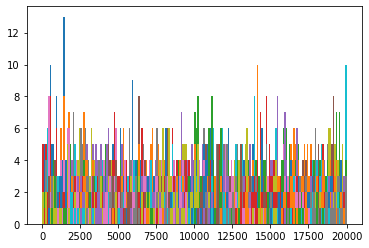

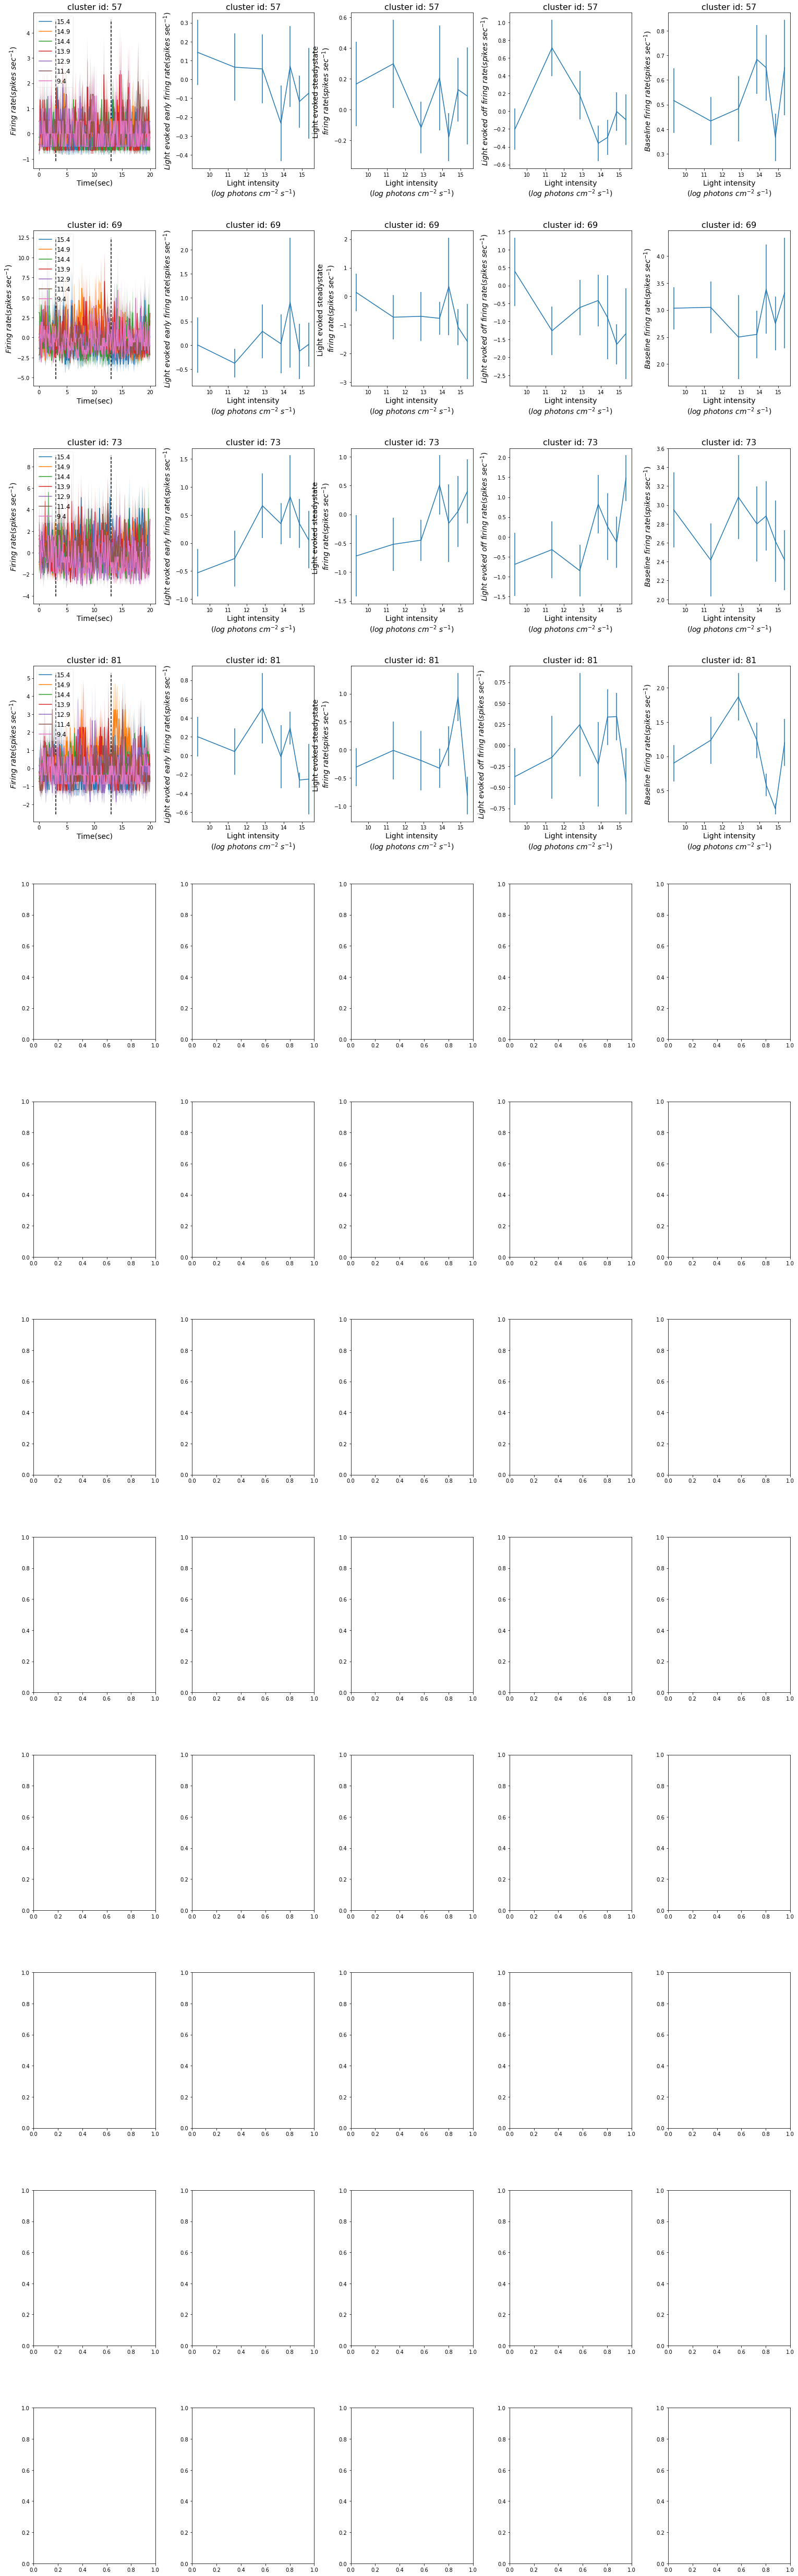

In [85]:
for i, (curr_events_ts_df, curr_spikes_reps_times_df, curr_pl_data) in enumerate(zip(splitted_events_ts, splitted_spikes_reps_times, splitted_pl_data)):
    # calculate mean duration of a repetition
    curr_events_ts_df = get_events_duration(curr_events_ts_df, curr_pl_data['ND'])
    nd_mean_duration = get_mean_duration_per_nd(curr_events_ts_df, curr_pl_data['ND'])
    general_mean_duration = np.array(list(nd_mean_duration.values())).mean()

    bins_vector = np.arange(0, length_of_trial + bin_length, step=bin_length)
    
    curr_spikes_reps_ms_df = (curr_spikes_reps_times_df * MS).fillna(-1)

    histogram = curr_spikes_reps_ms_df.apply(plt.hist, bins=bins_vector, histtype='stepfilled') # create histograms
    # save histograms parameters
    hist_index = pd.MultiIndex.from_product([['values', 'edges', 'histogram'], relevant_clusters, curr_pl_data['ND'], 
                                             np.arange(0, len(curr_events_ts_df))], names=['hist', 'id', 'nd', 'rep'])
    histogram_df = pd.DataFrame(np.nan, index=np.arange(0, len(curr_spikes_reps_times_df + 1)), columns=hist_index)
    histogram_df = get_histogram_parameters(histogram, histogram_df)
    
    bins_per_sec = MS / bin_length
    histogram_values_df = histogram_df['values'] * bins_per_sec
    
    three_sec = int((pre * MS) / bin_length)
    
    # if all nds are equal use the original data (without normalization)
    #if len(pd.unique(curr_pl_data['original_nd'])) == 1:
    #    standardize = False

    # standardize the data
    if standardize: 
        aligned_hist_df = histogram_values_df - histogram_values_df[0 : three_sec].mean(axis=0) 
    else:
        aligned_hist_df = histogram_values_df
        
    if remove_high_movement_correlation:
        movement_frequency = 1000
        downsampled_histogram_values_df = get_downsampled_histogram_df(curr_events_ts_df, curr_pl_data, 
                                                                       curr_spikes_reps_ms_df, relevant_clusters, 
                                                                       length_of_trial, MS, movement_frequency)
        movement_reps_df = pd.read_csv(os.path.join(working_directory.replace('psth', 'movement'), 
                                                    'files\movement_yaw_data.csv'), header=[0, 1], index_col=0)
        new_samples_num = int(len(movement_reps_df) / movement_frequency)
        downsampled_movement_df = downsample_data(movement_reps_df, movement_reps_df.columns, new_samples_num)
        correlation = get_correlation(downsampled_histogram_values_df, downsampled_movement_df)

        indices_to_remove = correlation.loc[correlation['p_value'] < 0.05].index
        high_correlation_precentage = pd.DataFrame([len(correlation.loc[correlation['corr_coef'] >= 0.5]), 
                                                    len(correlation.loc[correlation['corr_coef'] <= -0.5]),
                                                    len(correlation.loc[abs(correlation['corr_coef']) >= 0.5]),
                                                    len(indices_to_remove),
                                                    len(histogram_values_df.T.index), 
                                                    len(indices_to_remove) / len(histogram_values_df.T.index)],
                                                   ['high_positive_correlation',
                                                    'high_negative_correlation',
                                                    'total_high_correlation',
                                                    'significant_p_value',
                                                    'total',
                                                    'significant_p_value_precentage'])
        high_correlation_precentage.to_csv(r'{}\files\high_correlation_precentage.csv'.format(working_directory), sep=',', encoding='utf-8')
        correlation.to_csv(r'{}\files\correlations.csv'.format(working_directory), sep=',', encoding='utf-8')
        histogram_values_df = histogram_values_df.drop(indices_to_remove, axis=1, inplace=False)
        aligned_hist_df = aligned_hist_df.drop(indices_to_remove, axis=1, inplace=False)

    # calculate base and psth statistics
    psth_statistics_index = pd.MultiIndex.from_product([relevant_clusters, curr_pl_data['ND'], ['mean_base', 'std_base', 'sem_base', 'mean_psth', 'std_psth', 'sem_psth']], names=['id', 'nd', 'stats'])
    statistics_df = pd.DataFrame(np.nan, index=np.arange(0, len(aligned_hist_df)), columns=psth_statistics_index)
    statistics_df = calculate_statistics(histogram_values_df, statistics_df, np.arange(0, three_sec), 'mean_base', 'std_base', 'sem_base')
    statistics_df = statistics_df.fillna(method='ffill')
    statistics_df = calculate_psth_statistics(statistics_df, aligned_hist_df)
    
    # calculate and remove clusters with baseline max response <= 0.5
    base_cluster_groups = get_clusters_groups_from_multiindex_df(statistics_df.loc[:, idx[:, :, ['mean_base', 'sem_base']]].head(1), curr_pl_data)
    if remove_low_baseline_clusters:
        clusters_to_remove = get_clusters_to_remove_according_to_baseline(base_cluster_groups, 'mean_base')
        relevant_clusters = list(set(relevant_clusters) - set(clusters_to_remove))
        statistics_df = statistics_df.drop(columns=clusters_to_remove)
        aligned_hist_df = aligned_hist_df.drop(columns=clusters_to_remove)
        histogram_values_df = histogram_values_df.drop(columns=clusters_to_remove)
    
    # save aligned histogram data to csv file
    aligned_hist_df.to_csv(r'{}\files\aligned_histogram_data_{}.csv'.format(working_directory, i), sep=',', encoding='utf-8')
    histogram_values_df.to_csv(r'{}\files\histogram_data_{}.csv'.format(working_directory, i), sep=',', encoding='utf-8')

    # calculate early state, steady state and off statistics
    early_response_indices, steady_state_indices, off_indices = get_early_response_and_steady_state_and_off_indices(len(aligned_hist_df), pre, post, 1.5, 3, 2)

    statistics_index = pd.MultiIndex.from_product([relevant_clusters, curr_pl_data['ND'], ['mean', 'std', 'sem']], names=['id', 'nd', 'stats'])
    early_state_df = pd.DataFrame(np.nan, index=[0], columns=statistics_index)
    steady_state_df = pd.DataFrame(np.nan, index=[0], columns=statistics_index)
    off_df = pd.DataFrame(np.nan, index=[0], columns=statistics_index)
    early_state_df = calculate_statistics(aligned_hist_df, early_state_df, early_response_indices, 'mean', 'std', 'sem')
    steady_state_df = calculate_statistics(aligned_hist_df, steady_state_df, steady_state_indices, 'mean', 'std', 'sem')
    off_df = calculate_statistics(aligned_hist_df, off_df, off_indices, 'mean', 'std', 'sem')
    
    # save early state, steady state and off statistics to files
    early_state_df.to_csv(r'{}\files\early_state_response_{}.csv'.format(working_directory, i), sep=',', encoding='utf-8')
    steady_state_df.to_csv(r'{}\files\steady_state_response_{}.csv'.format(working_directory, i), sep=',', encoding='utf-8')
    off_df.to_csv(r'{}\files\off_response_{}.csv'.format(working_directory, i), sep=',', encoding='utf-8')

    # fix the data structure in order to plot it
    cluster_groups = get_clusters_groups_from_multiindex_df(statistics_df.loc[:, idx[:, :, ['mean_psth', 'sem_psth']]], curr_pl_data)
    early_state_cluster_groups = get_clusters_groups_from_multiindex_df(early_state_df.loc[:, idx[:, :, ['mean', 'sem']]], curr_pl_data)
    steady_state_cluster_groups = get_clusters_groups_from_multiindex_df(steady_state_df.loc[:, idx[:, :, ['mean', 'sem']]], curr_pl_data)
    off_cluster_groups = get_clusters_groups_from_multiindex_df(off_df.loc[:, idx[:, :, ['mean', 'sem']]], curr_pl_data)
    # plot base, psth, early state and steady state
    plots_filename = r'{}\files\plots_{}.pdf'.format(working_directory, i)
    plot(bins_vector / MS, cluster_groups, base_cluster_groups, early_state_cluster_groups, steady_state_cluster_groups, off_cluster_groups, plots_filename)
    os.startfile(plots_filename) # open plots in a new window

    # create cluster df in order to classify the clusters
    clusters_df = pd.DataFrame(0, index=relevant_clusters, columns=['cluster_response_type'])

    # create classification menu
    response_types = ['Transient ON', 'Transient ON and transient OFF', 'Sustained ON', 'Delayed ON', 'Sustained OFF', 'Transient ON not intensity encoding']
    response_type_df = pd.DataFrame(response_types, columns=['response_type'])
    response_type_df.index = response_type_df.index + 1

    # write each dataframe to a different worksheet
    xlsx_filename = r'{}\files\clusters_summary_{}.xlsx'.format(working_directory, i)
    with pd.ExcelWriter(xlsx_filename) as writer:  
        response_type_df.to_excel(writer, sheet_name='response_types')
        clusters_df.to_excel(writer, sheet_name='clusters_response_type')
        statistics_df.loc[:, idx[:, :, ['mean_psth']]].to_excel(writer, sheet_name='mean_psth')
        early_state_df.loc[:, idx[:, :, ['mean']]].to_excel(writer, sheet_name='early_state_mean')
        steady_state_df.loc[:, idx[:, :, ['mean']]].to_excel(writer, sheet_name='steady_state_mean')
        off_df.loc[:, idx[:, :, ['mean']]].to_excel(writer, sheet_name='off_mean')
        writer.save()

In [ ]:
for name, group in cluster_groups:
    print(name, group)

In [ ]:
def load_list_of_files_to_one_df(working_directory, filename):
    # find relevant files
    all_files = glob.glob(r'{}\files\{}_*'.format(working_directory, filename))
    dfs_list = []
    
    # load all files to one dataframe
    for f in all_files:
        df = pd.read_csv(f, index_col=0, header=[0, 1, 2])
        dfs_list.append(df)
    full_df = pd.concat(dfs_list, axis=1).fillna(0)
    full_df = full_df.loc[:, ~full_df.columns.duplicated()] # remove duplicated columns 
    return full_df

In [ ]:
def plot_mean_firing_rate(working_directory, df, nds, reps_num=3):
    # take reps_num first repetitions 
    reps = map(str, range(reps_num))
    partial_reps_df = df[df.columns[df.columns.get_level_values('rep').isin(reps)]]

    reps_mean_firing_rate = partial_reps_df.mean() # calculate mean for each repetition over time
    mean_firing_rate_df = reps_mean_firing_rate.groupby(level=[0, 1]).mean() # calculate mean for each nd
    mean_firing_rate_df = mean_firing_rate_df.unstack().fillna(0)
    mean_firing_rate_df.index = mean_firing_rate_df.index.astype('int64')
    mean_firing_rate_df = mean_firing_rate_df.sort_index()

    # plot each nd mean over sequences
    for nd in nds:
        nd_df = mean_firing_rate_df.filter(regex='{}_'.format(nd))
        nd_df.T.plot(subplots=True, layout=(math.ceil(len(nd_df) / 4), 4), figsize=(20, 50), sharex=False)
        plt.savefig(r'{}\files\mean_firing_rate_nd_{}.pdf'.format(working_directory, nd), bbox_inches='tight') # save plots
        plt.close()
    return

In [ ]:
interpolated_histogram_data_df = load_list_of_files_to_one_df(working_directory, 'interpolated_histogram_data')

In [ ]:
# plot mean firing rate for each nd over all sequences
plot_mean_firing_rate(working_directory, interpolated_histogram_data_df, pl_data['original_nd'].unique())